In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train = np.loadtxt(r'C:\Users\Gaodongyu\Documents\gaodongyu\10 math of ML\sourcecode-cn\sourcecode-cn\click.csv', delimiter=',', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

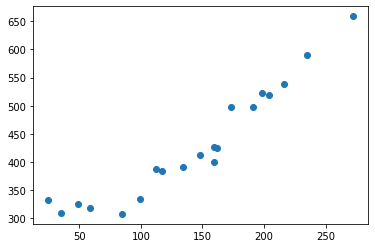

In [6]:
plt.plot(train_x, train_y, 'o')
plt.show()

线性回归

In [8]:
theta0 = np.random.rand()
theta1 = np.random.rand()

In [10]:
def f(x):
    return theta0 + theta1 * x

In [11]:
def E(x,y):
    return 0.5 * (np.sum(y - f(x)) ** 2)

In [13]:
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu)/sigma
train_z = standardize(train_x)

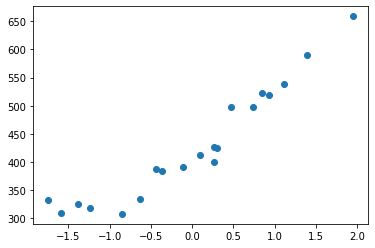

In [16]:
plt.plot(train_z, train_y, 'o')
plt.show()

In [18]:
ETA = 1e-3
diff = 1
count = 0

error = E(train_z, train_y)
while diff > 1e-2:
    tmp0 = theta0 - ETA * np.sum(f(train_z) - train_y)
    tmp1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    theta0 = tmp0
    theta1 = tmp1
    
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    count += 1
    log = '第{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差值 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

第1次: theta0 = 17.385, theta1 = 4.175, 差值 = 1398207.8839
第2次: theta0 = 25.620, theta1 = 5.961, 差值 = 1342838.8517
第3次: theta0 = 33.691, theta1 = 7.712, 差值 = 1289662.4331
第4次: theta0 = 41.600, theta1 = 9.427, 差值 = 1238591.8008
第5次: theta0 = 49.351, theta1 = 11.108, 差值 = 1189543.5655
第6次: theta0 = 56.947, theta1 = 12.756, 差值 = 1142437.6403
第7次: theta0 = 64.391, theta1 = 14.370, 差值 = 1097197.1097
第8次: theta0 = 71.686, theta1 = 15.952, 差值 = 1053748.1042
第9次: theta0 = 78.836, theta1 = 17.503, 差值 = 1012019.6793
第10次: theta0 = 85.842, theta1 = 19.022, 差值 = 971943.7000
第11次: theta0 = 92.708, theta1 = 20.511, 差值 = 933454.7294
第12次: theta0 = 99.437, theta1 = 21.971, 差值 = 896489.9221
第13次: theta0 = 106.031, theta1 = 23.401, 差值 = 860988.9212
第14次: theta0 = 112.494, theta1 = 24.802, 差值 = 826893.7600
第15次: theta0 = 118.827, theta1 = 26.176, 差值 = 794148.7671
第16次: theta0 = 125.033, theta1 = 27.522, 差值 = 762700.4759
第17次: theta0 = 131.115, theta1 = 28.841, 差值 = 732497.5370
第18次: theta0 = 137.076, theta1

<function matplotlib.pyplot.show(*args, **kw)>

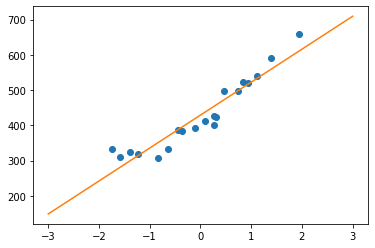

In [21]:
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show

In [26]:
print(f(standardize(100)))
print(f(standardize(200)))
print(f(standardize(300)))

371.0671318142877
510.6070577655279
650.1469837167681


多项式回归

In [28]:
theta = np.random.rand(3)

In [29]:
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x**2]).T

In [31]:
X = to_matrix(train_z)

In [32]:
def f(x):
    return np.dot(x, theta)

In [34]:
diff = 1

error = E(X, train_y)
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

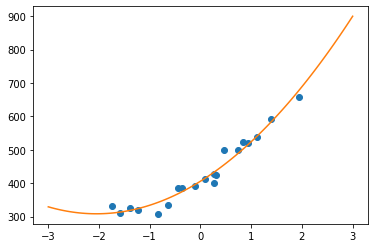

In [36]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()

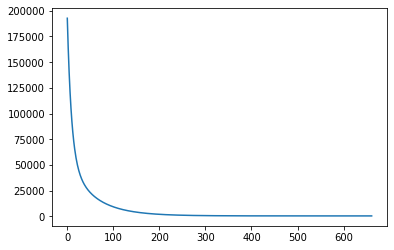

In [38]:
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

theta = np.random.rand(3)

errors = []
diff = 1
errors.append(MSE(X, train_y))
while  diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()

随机梯度下降法

In [41]:
theta = np.random.rand(3)

errors = []

diff = 1

#重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    p = np.random.permutation(X.shape[0])
    for x,y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

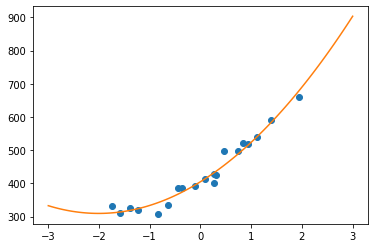

In [42]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()